In [1]:
import os
import sys
sys.path.append('../../src/')
import csv
import pickle as pk

import numpy as np
import scipy.sparse as sp
import pandas as pd
import matplotlib.pyplot as plt

## Load sector membership alignments

In [2]:
with open('sector_alignment.pk', 'rb') as handle:
    sector_alignment_dict = pk.load(handle)

## For a specific time series

In [3]:
cor_adj = pd.read_csv('./yearly/corr_networks_MR/20001229_Corr.csv')
cor_adj.drop('Unnamed: 0', inplace=True, axis=1)
corrs = cor_adj.values
cor_adj

,AA,ABM,ABT,ADI,ADM,ADX,AEE,AEG,AEM,AEP,...,XLI,XLK,XLP,XLU,XLV,XLY,XOM,XRX,YUM,ZTR
0,1.000,0.094,0.171,-0.122,0.153,0.188,0.232,0.171,0.051,0.225,...,0.284,-0.131,0.141,0.234,0.174,0.203,0.227,0.104,0.111,0.164
1,0.094,1.000,0.276,-0.068,0.171,0.337,0.383,0.186,0.323,0.296,...,0.235,-0.115,0.279,0.308,0.181,0.169,0.299,0.020,0.172,0.329
2,0.171,0.276,1.000,-0.236,0.264,0.318,0.395,0.181,0.209,0.395,...,0.228,-0.314,0.550,0.361,0.211,0.259,0.360,0.092,0.267,0.265
3,-0.122,-0.068,-0.236,1.000,-0.056,-0.125,-0.265,-0.036,-0.133,-0.242,...,-0.077,0.452,-0.287,-0.232,-0.070,-0.231,-0.228,0.056,-0.083,-0.077
4,0.153,0.171,0.264,-0.056,1.000,0.222,0.364,0.244,0.197,0.323,...,0.249,-0.201,0.356,0.244,0.197,0.261,0.270,0.069,0.249,0.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,0.203,0.169,0.259,-0.231,0.261,0.263,0.260,0.180,0.152,0.258,...,0.362,-0.253,0.330,0.245,0.301,1.000,0.147,0.074,0.213,0.212
690,0.227,0.299,0.360,-0.228,0.270,0.315,0.481,0.206,0.280,0.457,...,0.218,-0.380,0.461,0.475,0.215,0.147,1.000,0.075,0.171,0.309
691,0.104,0.020,0.092,0.056,0.069,0.073,0.044,-0.004,0.056,0.074,...,0.073,-0.022,0.028,0.065,0.068,0.074,0.075,1.000,0.066,0.063
692,0.111,0.172,0.267,-0.083,0.249,0.201,0.223,0.053,0.168,0.274,...,0.208,-0.108,0.259,0.186,0.189,0.213,0.171,0.066,1.000,0.215


(array([243.,  29.,  36.,  74.,  93.,  90.,  36.,  28.,  27.,  38.]),
 array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <BarContainer object of 10 artists>)

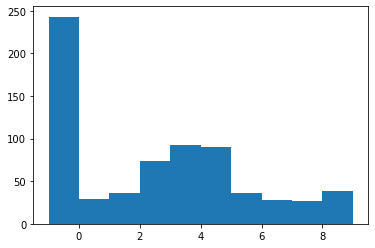

In [4]:
cor_labels = np.zeros(corrs.shape[0])
cor_names = np.array(cor_adj.columns)
for i in range(cor_labels.shape[0]):
    try:
        cor_labels[i] = sector_alignment_dict[cor_names[i]]
    except KeyError: # cannot find the name
        cor_labels[i] = -1
plt.hist(cor_labels)

In [5]:
valid_ind = cor_labels>=0
labels_truncated = cor_labels[valid_ind]
corr_truncated = corrs[valid_ind][:,valid_ind]
print(labels_truncated.shape, corr_truncated.shape)

(451,) (451, 451)


In [31]:
np.save('labels_MR_yearly_2000.npy', labels_truncated)
sp.save_npz('adj_MR_yearly_2000.npz',sp.csr_matrix(corr_truncated))

## For all the other yearly time series

In [6]:
yearly_dict = {}
year_index = 0
for year in range(2000, 2021):
    for month in [12]:
        if month<10:
            month_str = '0' + str(month)
        else:
            month_str = str(month)
        not_found_yet = True
        date = 28
        while not_found_yet:
            name_str = str(year) + month_str + str(date)
            save_path = './yearly/corr_networks_MR/'+name_str+'_Corr.csv'
            if not os.path.exists(save_path):
                date += 1
                if date > 31:
                    break
            else:
                not_found_yet = False
                yearly_dict[year_index] = 'MR_yearly_' + str(year)
                year_index += 1
                if not os.path.exists('labels_MR_yearly_'+str(year) +'.npy'):
                    try:
                        cor_adj = pd.read_csv(save_path)
                        cor_adj.drop('Unnamed: 0', inplace=True, axis=1)
                        corrs = cor_adj.values
                        cor_labels = np.zeros(corrs.shape[0])
                        cor_names = np.array(cor_adj.columns)
                        for i in range(cor_labels.shape[0]):
                            try:
                                cor_labels[i] = sector_alignment_dict[cor_names[i]]
                            except KeyError: # cannot find the name
                                cor_labels[i] = -1
                        valid_ind = cor_labels>=0
                        features_truncated = features[valid_ind]
                        labels_truncated = cor_labels[valid_ind]
                        corr_truncated = corrs[valid_ind][:,valid_ind]
                        print(labels_truncated.shape, corr_truncated.shape)
                        np.save('labels_MR_yearly_'+str(year), labels_truncated)
                        sp.save_npz('adj_MR_yearly_'+str(year),sp.csr_matrix(corr_truncated))
                        print(str(year) + ' done!')
                    except IndexError:
                        print(str(year) + ' index error!')
                else:
                    print(str(year) + ' already done!')
print(yearly_dict)

2000 already done!
2001 already done!
2002 already done!
2003 already done!
2004 already done!
2005 already done!
2006 already done!
2007 already done!
2008 already done!
2009 already done!
2010 already done!
2011 already done!
2012 already done!
2013 already done!
2014 already done!
2015 already done!
2016 already done!
2017 already done!
2018 already done!
2019 already done!
2020 already done!
{0: 'MR_yearly_2000', 1: 'MR_yearly_2001', 2: 'MR_yearly_2002', 3: 'MR_yearly_2003', 4: 'MR_yearly_2004', 5: 'MR_yearly_2005', 6: 'MR_yearly_2006', 7: 'MR_yearly_2007', 8: 'MR_yearly_2008', 9: 'MR_yearly_2009', 10: 'MR_yearly_2010', 11: 'MR_yearly_2011', 12: 'MR_yearly_2012', 13: 'MR_yearly_2013', 14: 'MR_yearly_2014', 15: 'MR_yearly_2015', 16: 'MR_yearly_2016', 17: 'MR_yearly_2017', 18: 'MR_yearly_2018', 19: 'MR_yearly_2019', 20: 'MR_yearly_2020'}


In [34]:
with open('yearly_dict.pk', 'wb') as handle:
    pk.dump(yearly_dict, handle, protocol=pk.HIGHEST_PROTOCOL)